In [164]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [165]:
%matplotlib inline

In [166]:
original = cv2.imread("images/test.jpeg")

#This is actually the original image
img = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
cpy = np.copy(img)


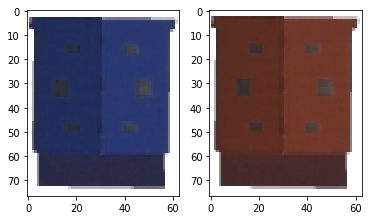

In [167]:
plt.figure(1)
plt.subplot(121)
plt.imshow(original)

plt.subplot(122)
plt.imshow(img)
plt.show()

In [ ]:
img_hsv = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

In [168]:

vectorized = cpy.reshape((-1, 3))
vectorized = np.float32(vectorized)
mean_R = np.mean(vectorized[:,0])
mean_G = np.mean(vectorized[:,1])
mean_B = np.mean(vectorized[:,2])

print(f"Mean: R: {mean_R}, G: {mean_G}, B: {mean_B}")
print(vectorized[0])
#Grey World
for i in range(0, len(vectorized)):
    vectorized[i][0] = vectorized[i][0]/mean_R
    vectorized[i][1] = vectorized[i][1]/mean_G
    vectorized[i][2] = vectorized[i][2]/mean_B

print(vectorized[0])

Mean: R: 125.19831085205078, G: 89.59822845458984, B: 81.70645141601562
[255. 255. 255.]
[2.0367687 2.8460383 3.1209285]


In [169]:
result_image = vectorized.reshape((cpy.shape))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


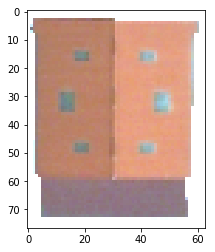

In [170]:
plt.imshow(result_image)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, 'Sobel abs(CV_64F)'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

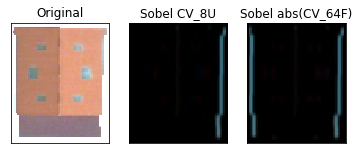

In [171]:
# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(result_image,cv2.CV_8U,1,0,ksize=5)

# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(result_image,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.subplot(1,3,1),plt.imshow(result_image,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])